From torch documentation: The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.<br>
`DataLoader` turns our dataset into a Python iterable such that a mini-batch of samples can be fed at once instead of the whole dataset for optimization.

In [1]:
import torch, torchvision
torch.__version__, torchvision.__version__

('2.0.0+cu118', '0.15.1+cu118')

In [2]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#### Getting torchvision dataset
`torchvision` provides some datasets that we can import to train our models. Here, we will use FashionMNIST dataset for demonstration. The returned variable is of type `Dataset` and has both features and the label of the sample at each index of the dataset.

In [3]:
train_data = torchvision.datasets.FashionMNIST(root="data",
                                               train=True, # download only training dataset
                                               download=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform=None)

test_data = torchvision.datasets.FashionMNIST(root="data",
                                               train=False, # download only test dataset
                                               download=True,
                                               transform=torchvision.transforms.ToTensor(),
                                               target_transform=None)

In [5]:
first_image, first_targe_label = train_data[0]
first_image.shape, first_targe_label

(torch.Size([1, 28, 28]), 9)

The above dataset has a `torch.dataset` datatype.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20ebf953c10>,
 <torch.utils.data.dataloader.DataLoader at 0x20ebf950880>)

Let's see how to interact with the dataloader. As mentioned before, `DataLoader` turns our dataset into a Python iterable.

In [9]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch

(torch.Size([32, 1, 28, 28]),
 tensor([9, 5, 9, 5, 4, 6, 8, 5, 6, 5, 7, 9, 9, 4, 8, 3, 5, 4, 2, 6, 8, 8, 0, 5,
         8, 4, 7, 5, 4, 9, 4, 9]))

Turns out, the `DataLoader` class converts the torchvision dataset features into the shape of B x C x H x W.<br>
Let's visualize a random sample from the training dataloader.

In [16]:
import random
random.seed(42)
random_int = random.randint(0, len(train_features_batch))


(-0.5, 27.5, 27.5, -0.5)

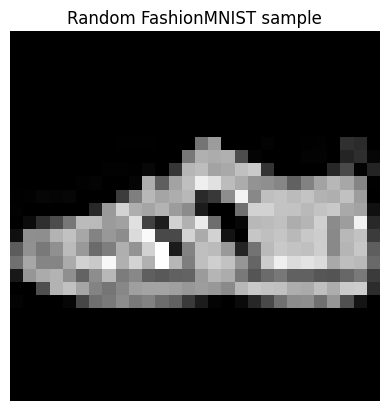

In [17]:

random_image, random_image_label = train_features_batch[random_int], train_labels_batch[random_int]
plt.imshow(random_image.squeeze(), cmap="gray")

plt.title("Random FashionMNIST sample")
plt.axis(False)
